# *QuantNbody* tutorials : visualization

**Chiari Even**

**Laboratoire de Chimie Quantique de Strasbourg, France**

**September 2024**

In this QuantNBody tutorial, we will explore a graphical method to visualize wavefunctions, which can be used to study them or compare them with excited states.

We refer users to the other tutorials to learn how to create many-body Hamiltonians and model systems. Here, we will focus on demonstrating how to use the plotting functions of the QuantNBody package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as la
import quantnbody.fermionic.tools as qnbft
import quantnbody.hybrid_fermionic_bosonic.tools as qnbhbft
import quantnbody.bosonic.tools as qnbbt




## Plot a single wavefunction

To study a wavefunction, we generally focus on the most important coefficients. In the figure below, we plot the ground state of a Fermi-Hubbard Hamiltonian with 3 molecular orbitals containing up to 4 electrons :


	-----------
	 Coeff.     N-body state and index 
	-------     ----------------------
	+0.50000   |110011⟩    #5 
	+0.35355   |110110⟩    #3 
	+0.35355   |011011⟩    #12 
	-0.35355   |100111⟩    #9 
	-0.35355   |111001⟩    #2 
	-0.25000   |101101⟩    #7 
	+0.25000   |111100⟩    #0 
	+0.25000   |001111⟩    #14 



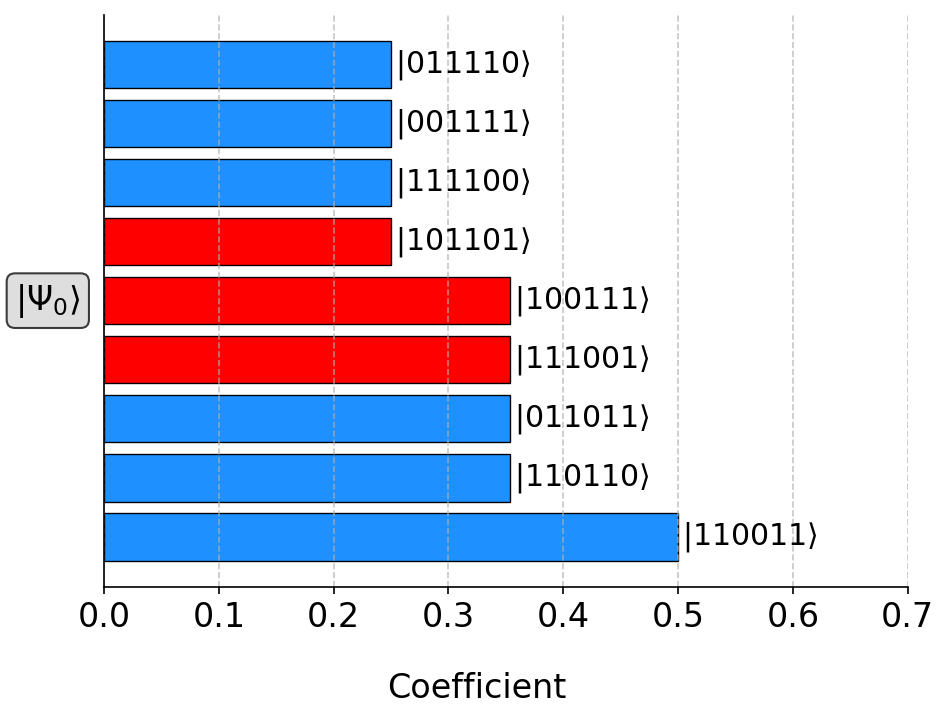

In [2]:

# Parameters for the simulation
nelec_active = 4  # Number of active electrons in the Active-Space  
n_mo = 3  # Number of molecular orbitals  

# Build the many-body basis and operator for the simulation
nbody_basis =qnbft.build_nbody_basis(n_mo, nelec_active)                      
a_dagger_a =qnbft.build_operator_a_dagger_a(nbody_basis)

# Hopping terms for the Hamiltonian
h_MO = np.zeros((n_mo, n_mo))
for site in range(n_mo - 1): 
    h_MO[site, site + 1] = h_MO[site + 1, site] = 1

# Interaction terms (U_MO) for the Hamiltonian with U = 0
list_U = [0]  # List of interaction strengths (U)
for U in list_U: 
    U_MO = np.zeros((n_mo, n_mo, n_mo, n_mo))
    for site in range(n_mo):
        U_MO[site, site, site, site] = U
    

# Build the Hamiltonian and solve for eigenvalues and eigenvectors
H = qnbft.build_hamiltonian_fermi_hubbard(h_MO, U_MO, nbody_basis, a_dagger_a)
eig_en, eig_vec = la.eigsh(H.A)  # Solve for the lowest eigenstates
    
# Plot the wavefunctions with a cutoff for small coefficients
WFT = eig_vec[:,:]
qnbft.visualize_wft(WFT[:,0], nbody_basis)
qnbft.plot_wavefunctions(WFT, nbody_basis, list_states=[0], probability=False, cutoff=0.075)





## Plot multiple wavefunctions
    


To compare two or more states, we can plot them simultaneously by specifying the states in the argument list_index=[0,1,2].


	-----------
	 Coeff.     N-body state and index 
	-------     ----------------------
	+0.50000   |110011⟩    #5 
	+0.35355   |110110⟩    #3 
	+0.35355   |011011⟩    #12 
	-0.35355   |100111⟩    #9 
	-0.35355   |111001⟩    #2 



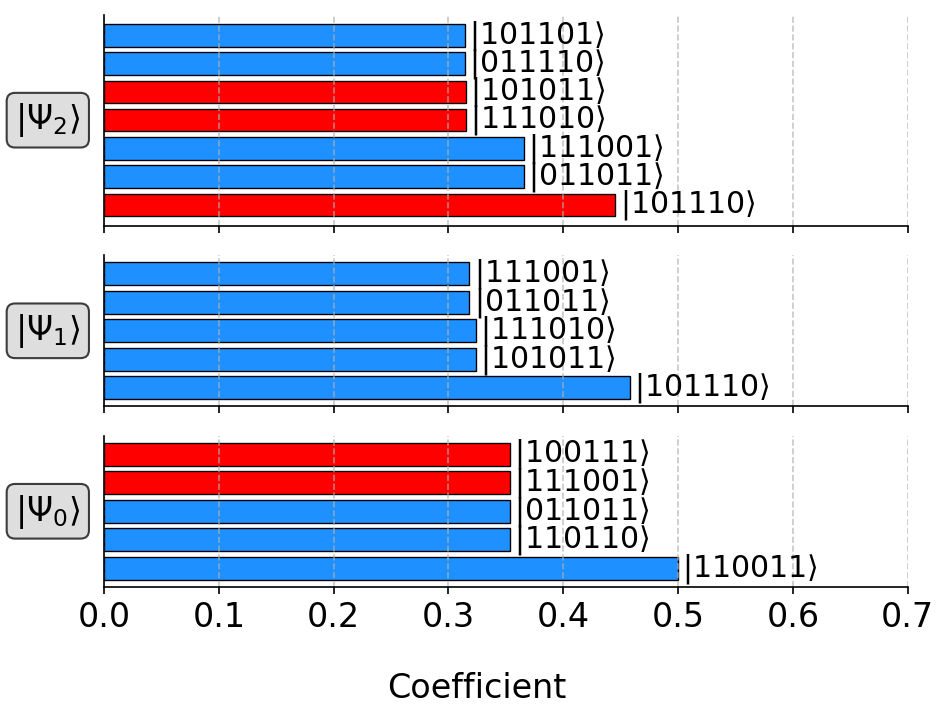

In [3]:

qnbft.visualize_wft(WFT[:,0], nbody_basis,cutoff=0.3)


qnbft.plot_wavefunctions(WFT, nbody_basis, list_states=[0,1,2], probability=False, cutoff=0.3)



## Bosonic systems


The function works exactly the same for bosonic systems; we just need to give a wavefunction of a bosonic system. Below, we show the wavefunction both in written form and as a plot for the Bose-Hubbard Hamiltonian with 3 modes containing up to 3 bosons.


	-----------
	 Coeff.      N-body state
	-------     -------------
	-0.57670	|4,0,0⟩
	-0.57670	|0,4,0⟩
	-0.57670	|0,0,4⟩



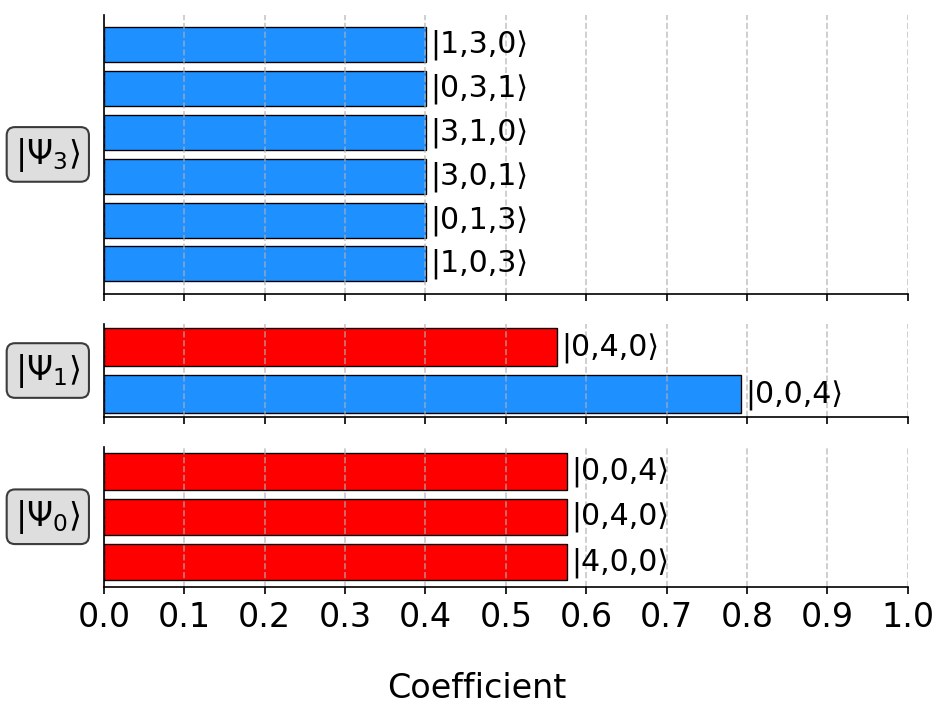

In [4]:
n_mode  = 3 # Number of modes
n_boson = 4 # Number of bosons

# Building the one-body tensor in a general extended basis
h_tensor = np.zeros(( n_mode, n_mode )) 
for site in range(n_mode): 
    for site_ in range(n_mode):
        if (site != site_): 
            h_tensor[site,site_] = h_tensor[site_,site] = -1 # <== a lattice fully connected with a same hopping term
            
# Building the two-body tensor in a general extended basis
U_tensor  = np.zeros(( n_mode, n_mode, n_mode, n_mode )) 
for site in range(n_mode):
    U_tensor[ site, site, site, site ]  = - 10.1 # <=== Local on-site attraction of the bosons
    

# Building the many-body basis
nbodybasis = qnbbt.build_nbody_basis( n_mode, n_boson )   

# Building the a†a operators
a_dagger_a = qnbbt.build_operator_a_dagger_a( nbodybasis )  

# Building the matrix representation of the Hamiltonian operators 
Hamiltonian = qnbbt.build_hamiltonian_bose_hubbard( h_tensor,
                                                                U_tensor,
                                                                nbodybasis,
                                                                a_dagger_a ) 
eig_en, eig_vec = la.eigsh( Hamiltonian.A) 

WFT = eig_vec[:,:]

qnbbt.visualize_wft(WFT[:,0],nbodybasis,cutoff=0.3)

qnbbt.plot_wavefunctions(WFT,nbodybasis, list_states=[0,1,3], probability=False, cutoff=0.3)

## Extension to hybrid systems

 


	-----------
	 Coeff.     N-body state and index 
	-------     ----------------------
	-0.69562   |00⟩ ⊗ |1101⟩    #1 
	+0.69562   |00⟩ ⊗ |0111⟩    #3 
	-0.10215   |01⟩ ⊗ |0111⟩    #11 
	+0.10215   |10⟩ ⊗ |1101⟩    #5 



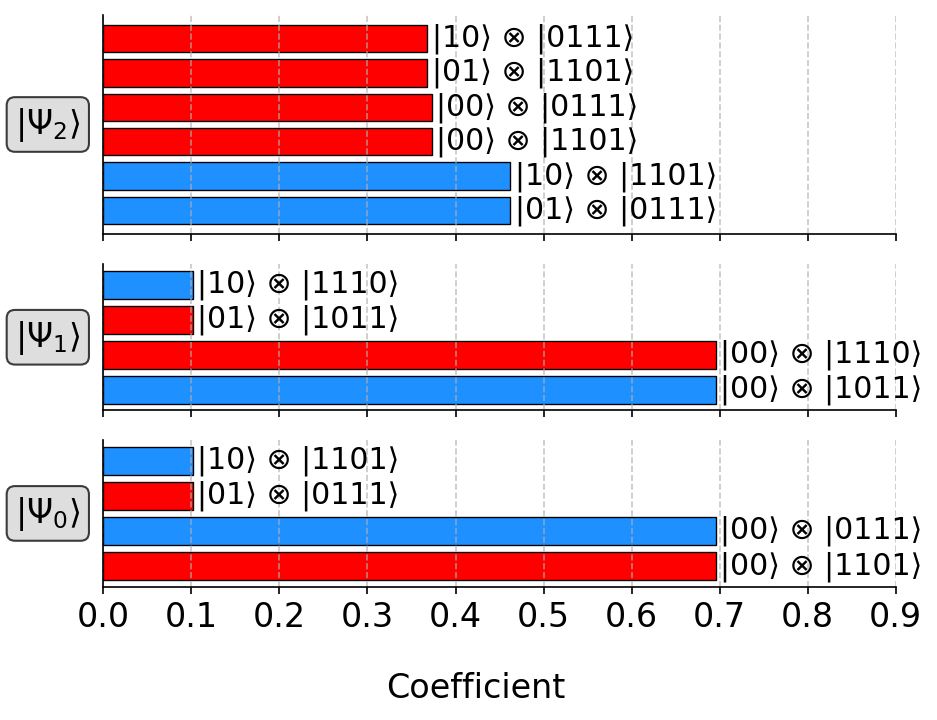

In [5]:

# ======================================
N_elec = 3  # Number of fermions
N_MO = 2    # Number of molecular orbitals

# ======================================
# Define the bosonic system
# ======================================
N_b_max = 3  # Max bosons in the system
N_mode = 2   # Number of bosonic modes
list_bosons = list(range(N_b_max + 1))  # Possible boson counts per mode

# ==============================================
# Build the hybrid many-body basis and operators
# ==============================================
# Construct the basis and operators
nbody_basis = qnbhbft.build_nbody_basis(N_mode, list_bosons, N_MO, N_elec)
a_dagger_a = qnbhbft.build_fermion_operator_a_dagger_a(nbody_basis, N_mode)
b = qnbhbft.build_boson_anihilation_operator_b(nbody_basis, N_mode)
b_dag = [op.T for op in b]  # Hermitian conjugate of bosonic creation operators

# Define parameters
t_val, U_val, omega_val, lambda_val = 0.5, 1, 0.95, 0.08
Coupling_fermion_boson = [lambda_val] * N_mode

# Fermionic Hamiltonian
t_ = np.zeros((N_MO, N_MO))
U_ = np.zeros((N_MO, N_MO, N_MO, N_MO))
np.fill_diagonal(U_, U_val)
np.fill_diagonal(t_[1:], -t_val)  # Hopping constants

# ====================================
# Bosonic and interaction Hamiltonian
# ====================================
omega_values = [omega_val] * N_mode
h_boson = np.diag(omega_values)

# Build the Holstein Hamiltonian
H_Holstein = qnbhbft.build_hamiltonian_hubbard_holstein(
    t_, U_, a_dagger_a, h_boson, b, Coupling_fermion_boson, nbody_basis
)

eig_energies, eig_vectors = np.linalg.eigh(H_Holstein.A)

WFT= eig_vectors[:, :]

# Visualize and plot wavefunctions
qnbhbft.visualize_wft(WFT[:,0], nbody_basis, N_mode, cutoff=0.10)
qnbhbft.plot_wavefunctions(WFT, nbody_basis, N_mode, list_states=[0, 1, 2], probability=False, cutoff=0.10)


## Optional arguments & Fine-Tunning

Multiple optional arguments are provided in the function to give the user good accessibility to arrange the plot as they want. They will be detailed in this section:

### "List_states"
This argument allows the user to choose the state to plot by specifying the index of the state, e.g., 0 for the ground state, 1 for the first excited state, etc.

### "probability"
Currently, the coefficients of each state are plotted, but the user can choose to plot the probability of the state. The state is given by:

$$ |\Psi_0 \rangle = \sum_i c_i |\phi_i \rangle $$

The probability amplitude of state $i$ is:

$$ |\langle \phi_i |\Psi_0 \rangle|^2 = | c_i |^2 $$



An example is shown below with the previous hybrid system:

In [6]:
qnbhbft.plot_wavefunctions(WFT, nbody_basis,N_mode, list_states=[0], probability=True, cutoff=0.10)



c:\users\ordi-even\desktop\work\phd\quantnbody_dev\quantnbody\quantnbody\hybrid_fermionic_bosonic\tools.py:1372: SyntaxWarning: invalid escape sequence '\s'
  """


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

### "cutoff"
To maintain tidiness, the user can choose to plot only the most important states by setting a cutoff value. Only states with values greater than the cutoff will be plotted.

### "label_props"
The size of all labels can be manually adjusted with this parameter. The first element adjusts the size of the bar labels and can be set to "x-small", "small", "medium", "large", "x-large", or "xx-large". The second and third elements adjust the size of the x-axis title and tick labels, respectively.